In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data=pd.read_csv('data.csv')
df=data.copy()

<H1>Data Understanding

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df.shape

(6819, 96)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [11]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

<H1>Data Preparation

In [19]:
import re
new_names=[]
pattern=r'\W+'

for col in df.columns:
    new_names.append(re.sub(pattern,'_',col.strip().lower()))
print(new_names)

['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest', 'roa_a_before_interest_and_after_tax', 'roa_b_before_interest_and_depreciation_after_tax', 'operating_gross_margin', 'realized_sales_gross_margin', 'operating_profit_rate', 'pre_tax_net_interest_rate', 'after_tax_net_interest_rate', 'non_industry_income_and_expenditure_revenue', 'continuous_interest_rate_after_tax_', 'operating_expense_rate', 'research_and_development_expense_rate', 'cash_flow_rate', 'interest_bearing_debt_interest_rate', 'tax_rate_a_', 'net_value_per_share_b_', 'net_value_per_share_a_', 'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons', 'cash_flow_per_share', 'revenue_per_share_yuan_', 'operating_profit_per_share_yuan_', 'per_share_net_profit_before_tax_yuan_', 'realized_sales_gross_profit_growth_rate', 'operating_profit_growth_rate', 'after_tax_net_profit_growth_rate', 'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate', 'total_asset_growth_rate', 'net_value_gr

In [20]:
df.columns=new_names

In [21]:
df.head()

,bankrupt_,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate_after_tax_,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest_bearing_debt_interest_rate,tax_rate_a_,net_value_per_share_b_,net_value_per_share_a_,net_value_per_share_c_,persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_yuan_,operating_profit_per_share_yuan_,per_share_net_profit_before_tax_yuan_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after_tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_,current_ratio,quick_ratio,interest_expense_ratio,total_debt_total_net_worth,debt_ratio_,net_worth_assets,long_term_fund_suitability_ratio_a_,borrowing_dependency,contingent_liabilities_net_worth,operating_profit_paid_in_capital,net_profit_before_tax_paid_in_capital,inventory_and_accounts_receivable_net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_times_,fixed_assets_turnover_frequency,net_worth_turnover_rate_times_,revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets_total_assets,current_assets_total_assets,cash_total_assets,quick_assets_current_liability,cash_current_liability,current_liability_to_assets,operating_funds_to_liability,inventory_working_capital,inventory_current_liability,current_liabilities_liability,working_capital_equity,current_liabilities_equity,long_term_liability_to_current_assets,retained_earnings_to_total_assets,total_income_total_expense,total_expense_assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long_term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholder_s_equity,liability_to_equity,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751

In [24]:
df.corr().iloc[0:,[0]]

,bankrupt_
bankrupt_,1.000000
roa_c_before_interest_and_depreciation_before_interest,-0.260807
roa_a_before_interest_and_after_tax,-0.282941
roa_b_before_interest_and_depreciation_after_tax,-0.273051
operating_gross_margin,-0.100043
realized_sales_gross_margin,-0.099445
operating_profit_rate,-0.000230
pre_tax_net_interest_rate,-0.008517
after_tax_net_interest_rate,-0.008857
non_industry_income_and_expenditure_revenue,-0.016593


In [25]:
df['net_income_flag'].value_counts()

1    6819
Name: net_income_flag, dtype: int64

<AxesSubplot:>

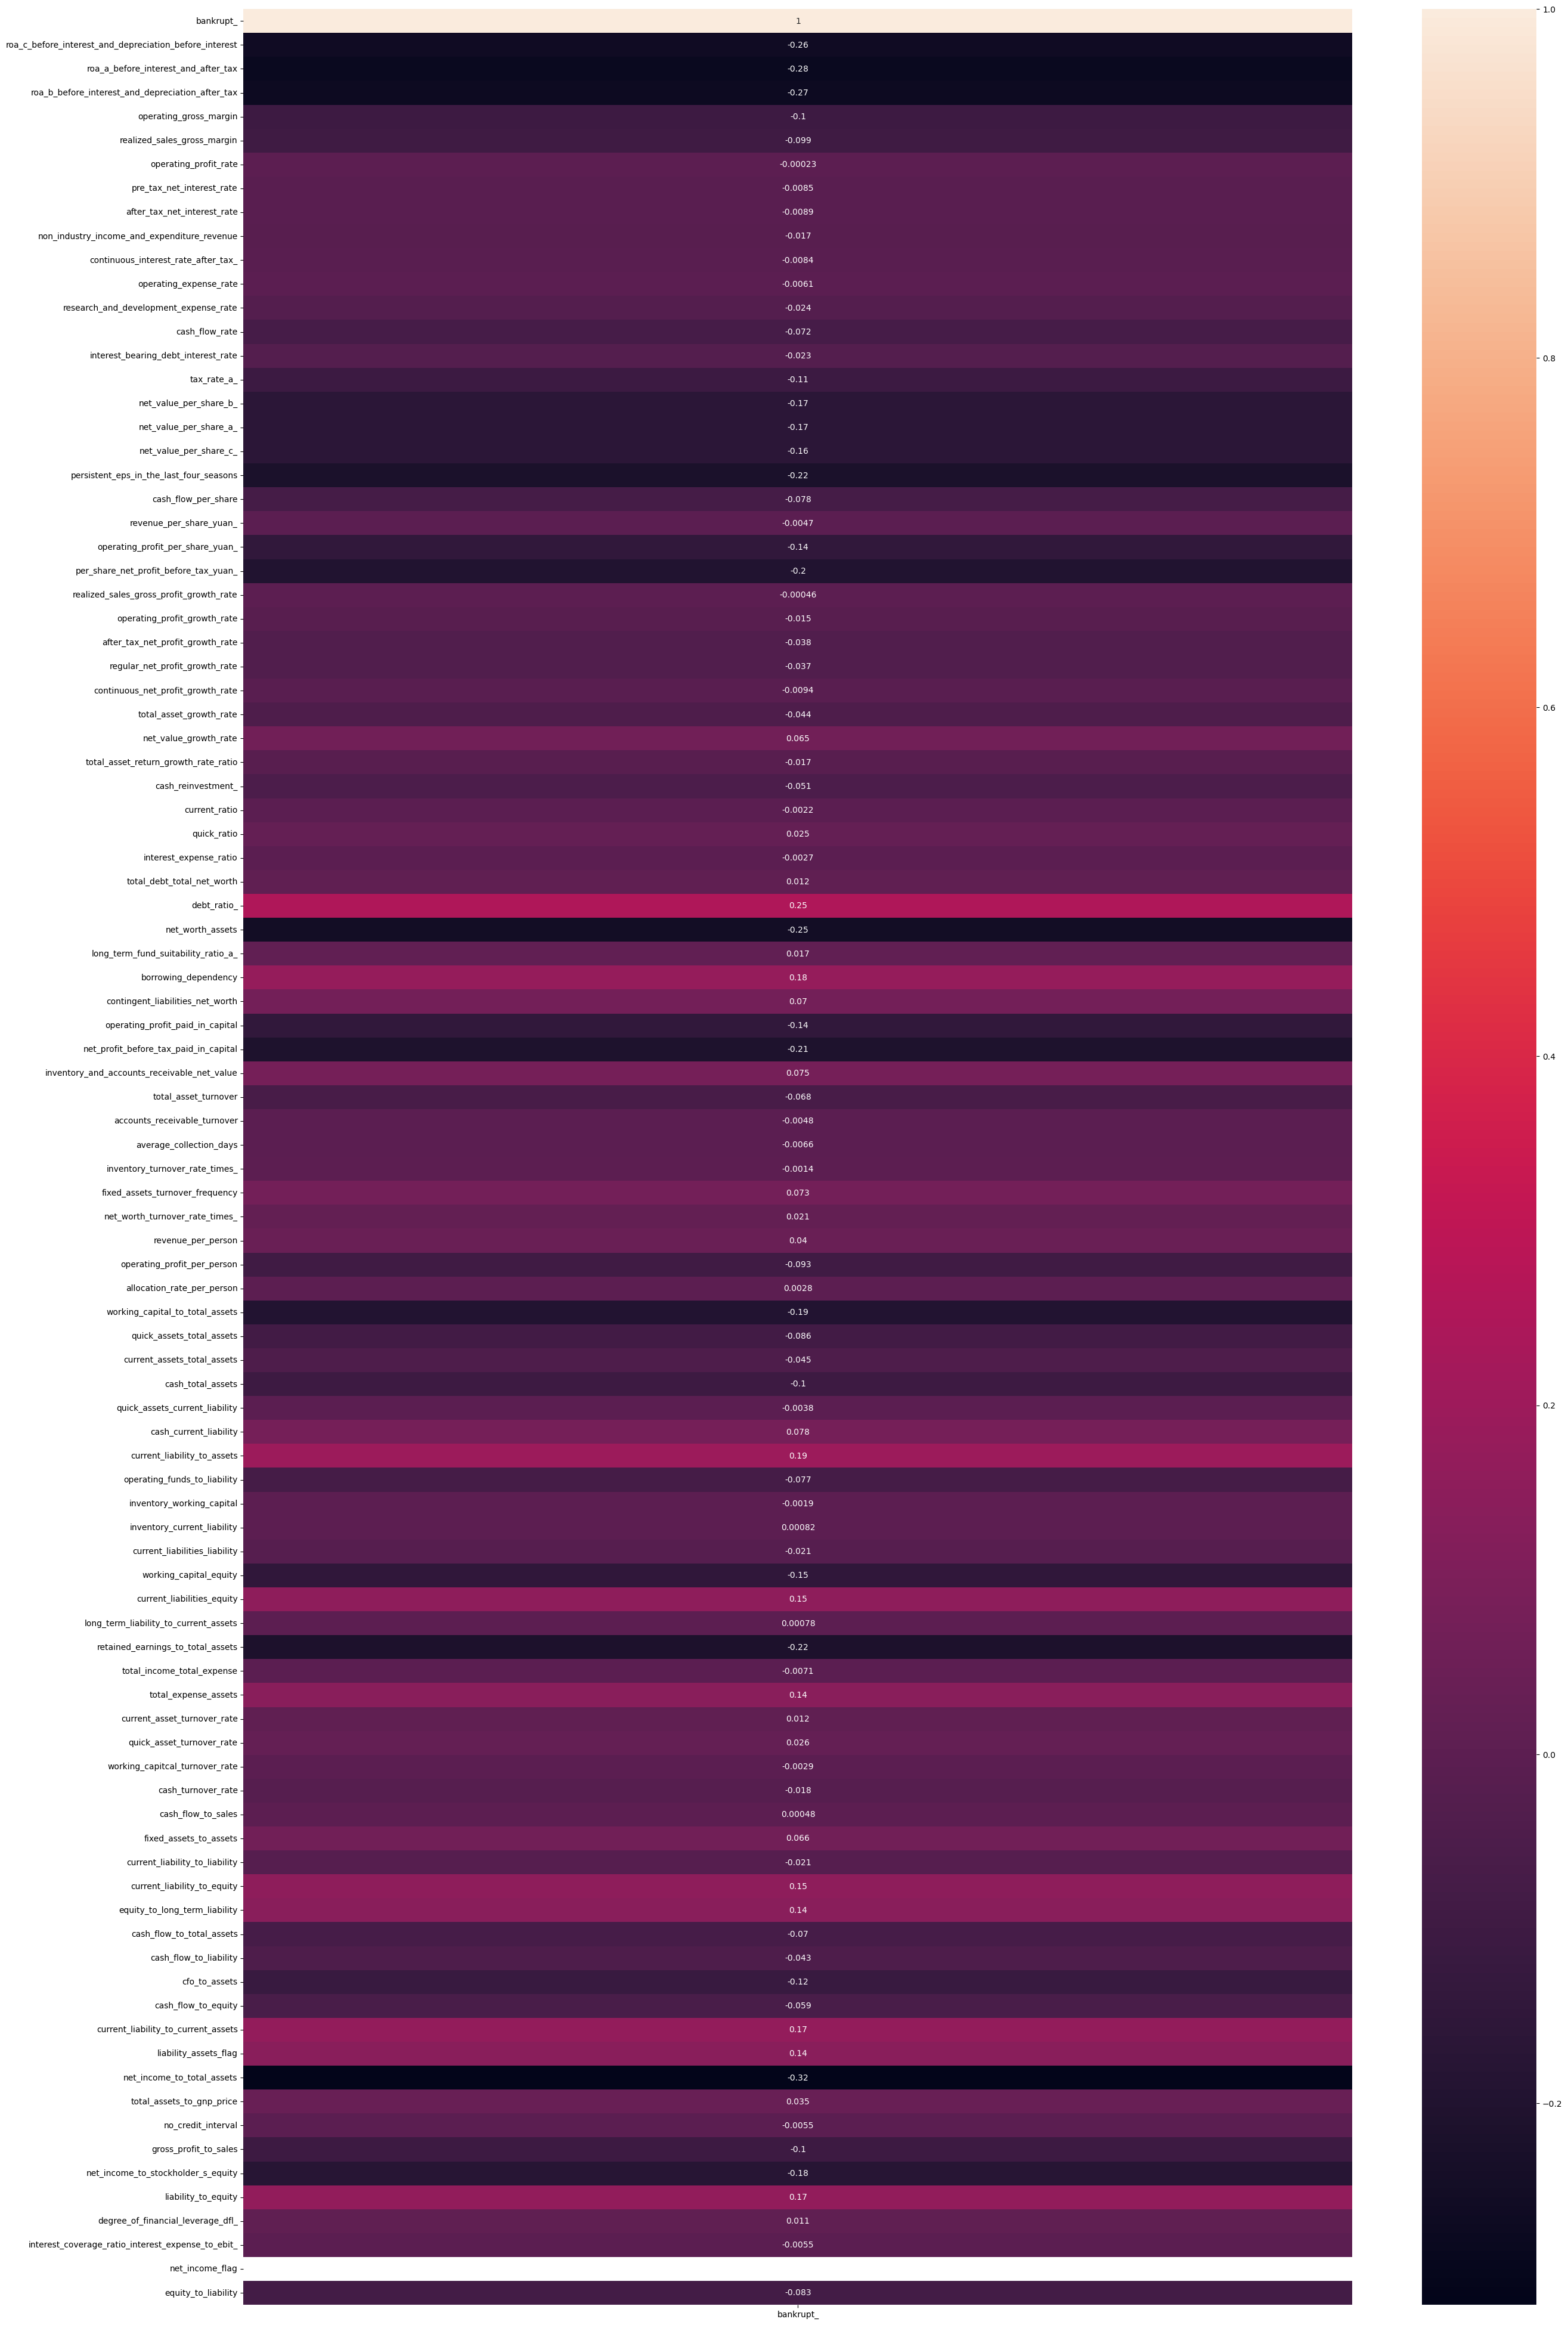

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,50))
sns.heatmap(df.corr().iloc[:,[0]], annot=True)

In [28]:
#check imbalance
df['bankrupt_'].value_counts()/df.shape[0]

0    0.967737
1    0.032263
Name: bankrupt_, dtype: float64

In [30]:
#check categorical columns
cat_cols=[]
for col in df.columns:
    if df[col].nunique()<20:
        cat_cols.append(col)

In [31]:
cat_cols

['bankrupt_', 'liability_assets_flag', 'net_income_flag']

In [33]:
df['liability_assets_flag'].value_counts()

0    6811
1       8
Name: liability_assets_flag, dtype: int64

In [34]:
df.drop(['liability_assets_flag','net_income_flag'], axis=1, inplace=True)

In [36]:
X=df.drop('bankrupt_',axis=1)
y=df['bankrupt_']

In [40]:
y.value_counts()

0    6599
1     220
Name: bankrupt_, dtype: int64

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
scaler = RobustScaler()
X_cols = X.columns
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_cols)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71,stratify=y)

In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5455, 93), (5455,), (1364, 93), (1364,))

<H1>Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model = BaggingClassifier(DecisionTreeClassifier(random_state=71))
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=71))

In [49]:
model.score(X_train, y_train)

0.9956003666361136

In [84]:
y_pred=model.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

Confusion Matrix
 [[1315    5]
 [  31   13]]

Accuracy score: 0.9736070381231672 
Precision score: 0.7222222222222222 
Recall score: 0.29545454545454547 
F1 score: 0.41935483870967744


In [50]:
from sklearn.linear_model import LogisticRegression
log_bag_model = BaggingClassifier(LogisticRegression())

In [52]:
log_bag_model.fit(X_train, y_train)
log_bag_model.score(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.9677360219981668

In [86]:
y_pred=log_bag_model.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

Confusion Matrix
 [[1320    0]
 [  44    0]]

Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<H1>Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gbc_model.fit(X_train, y_train)
gbc_model.score(X_train, y_train)

0.9715857011915674

In [67]:
y_pred = gbc_model.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

Confusion Matrix
 [[1319    1]
 [  38    6]]

Accuracy score: 0.9714076246334311 
Precision score: 0.8571428571428571 
Recall score: 0.13636363636363635 
F1 score: 0.2352941176470588


In [69]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 1.0/1.0 MB 865.0 kB/s eta 0:00:00


<H1>LightGBM

In [81]:
from lightgbm import LGBMClassifier
lgb_model=LGBMClassifier()
lgb_model.fit(X_train, y_train)


LGBMClassifier()

In [73]:
y_pred = lgb_model.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

Confusion Matrix
 [[1317    3]
 [  30   14]]

Accuracy score: 0.9758064516129032 
Precision score: 0.8235294117647058 
Recall score: 0.3181818181818182 
F1 score: 0.45901639344262296


<H1>XGBoost

In [78]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [82]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [83]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

Confusion Matrix
 [[1316    4]
 [  32   12]]

Accuracy score: 0.9736070381231672 
Precision score: 0.75 
Recall score: 0.2727272727272727 
F1 score: 0.39999999999999997
